**About Dataset**

A seasonal time series of California Hospitality Industry Employees.
This dataset contains the number of employees in thousands of persons as monthly averages from 1990-01-01 to 2018-12-01 (YYYY-MM-DD)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
raw_data = pd.read_csv("HospitalityEmployees.csv")

**Overview of Dataset**

In [3]:
raw_data.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


**Time Indexing**

In [4]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)

In [5]:
raw_data=raw_data.sort_index()

In [6]:
raw_data.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [7]:
raw_data.tail()

,Employees
Date,
2018-08-01,2019.1
2018-09-01,1992.5
2018-10-01,1984.3
2018-11-01,1990.1
2018-12-01,2000.2


In [8]:
#shape of data
raw_data.shape

(348, 1)

Our dataset has 348 Hospital employee records from 1990 going to 2018

In [9]:
raw_data.describe()

,Employees
count,348.000000
mean,1452.506897
std,256.604914
min,1064.500000
25%,1238.050000
50%,1436.200000
75%,1586.300000
max,2022.100000


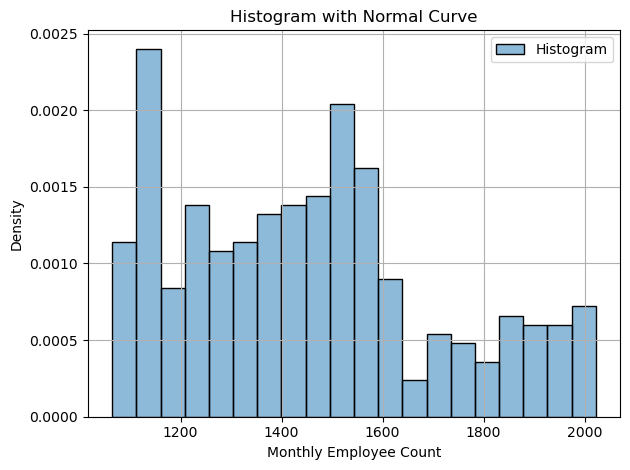

In [10]:
plt.Figure(figsize=(10,6))
sns.histplot(raw_data, kde=False, stat="density", bins=20, color='skyblue', label="Histogram")
plt.title('Histogram with Normal Curve')
plt.xlabel('Monthly Employee Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The monthly employee count at the hospital has a mean of 1,452 and a standard deviation of 256. The maximum observed value is 2,022 employees.

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 1990-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Employees  348 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB


### **Data Cleaning**

In [12]:
#checking for duplicates
duplicates = raw_data.index.duplicated().sum()
print(f"Duplicate timestamps: {duplicates}")

Duplicate timestamps: 0


In [13]:
#checking for missing values
raw_data.isnull().sum()

Employees    0
dtype: int64

### **Pattern Analysis**

In [14]:
#data for 1 year
data_2018=raw_data.loc['2018']

In [15]:
decompostion = seasonal_decompose(data_2018['Employees'],model="additive",period=1)

**Trends in the data**

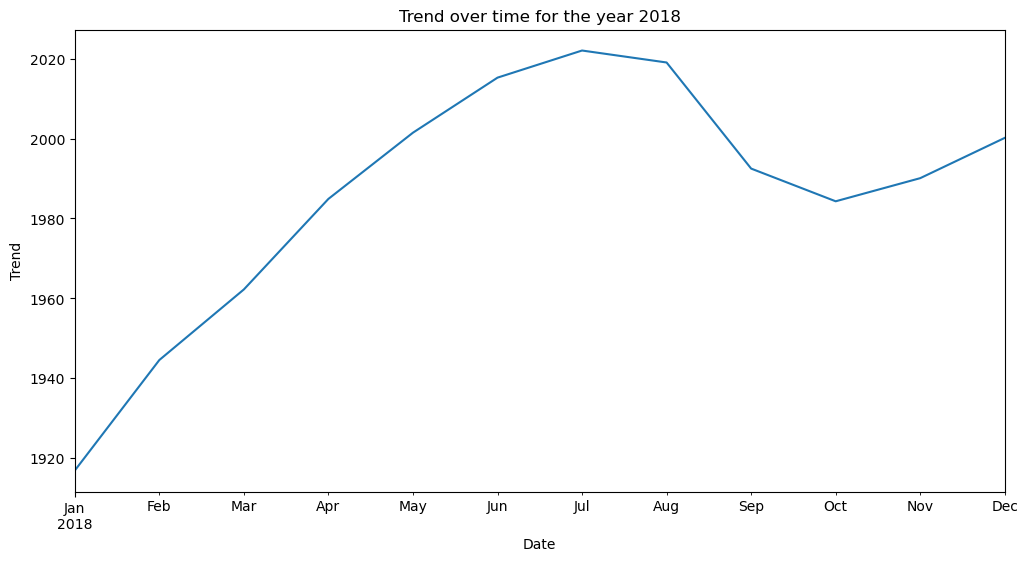

In [16]:
decompostion.trend.plot(title="Trend over time for the year 2018",figsize =(12,6))
plt.ylabel("Trend")
plt.show()

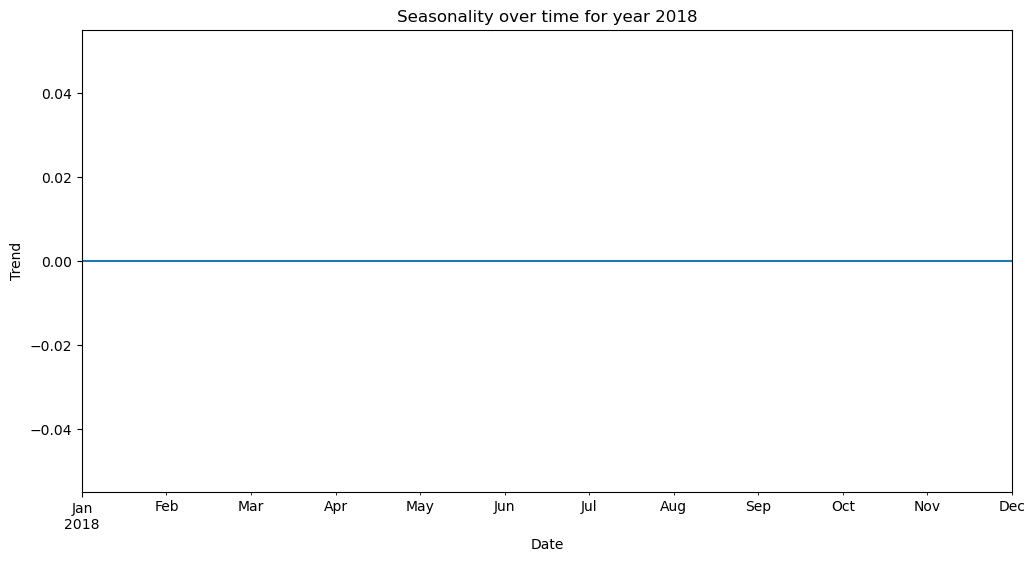

In [17]:
decompostion.seasonal.plot(title="Seasonality over time for year 2018",figsize =(12,6))
plt.ylabel("Trend")
plt.show()

In [18]:
#data for 1 year
data_1990=raw_data.loc['1990']
decomposition_1990 = seasonal_decompose(data_1990['Employees'],model="additive",period=1)

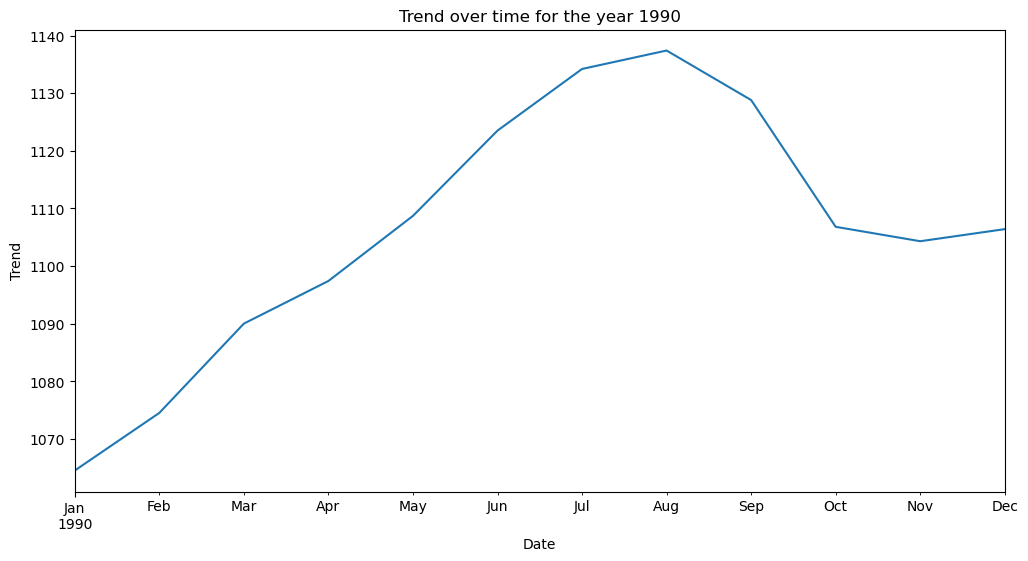

In [19]:
decomposition_1990.trend.plot(title="Trend over time for the year 1990",figsize =(12,6))
plt.ylabel("Trend")
plt.show()

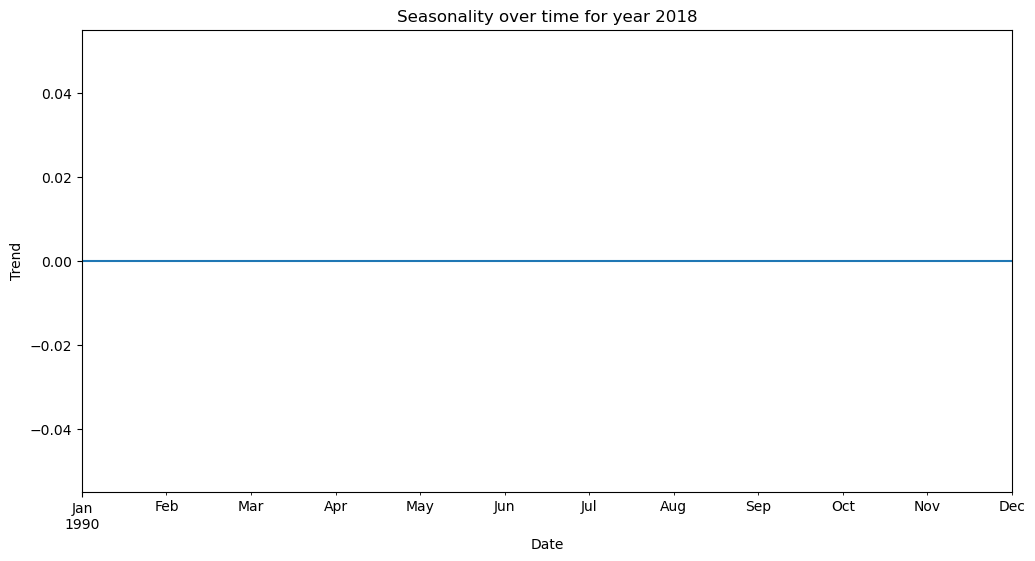

In [20]:
decomposition_1990.seasonal.plot(title="Seasonality over time for year 2018",figsize =(12,6))
plt.ylabel("Trend")
plt.show()

Based on the time series data from 1990 to 2018, there appears to be no significant change in seasonal patterns over the years. The seasonal component remains stable, suggesting consistent cyclical behavior across the observed period.

However, a notable trend is observed each year:
There is typically an increase in the number of employees between June and July, followed by a decline from August to October.

This pattern may be explained by:
- The end of internships or temporary contracts that typically conclude mid-year.
- A possible wave of retirements or non-renewal of contracts occurring after the mid-year review period.
- Seasonal employment tied to specific projects or academic cycles that end before Q4.

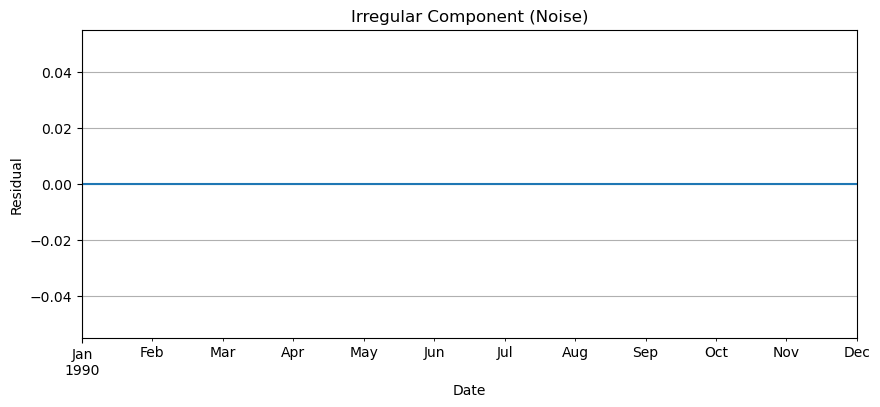

In [21]:
plt.figure(figsize=(16, 12))
decomposition_1990.resid.plot(title='Irregular Component (Noise)', figsize=(10,4))
plt.ylabel('Residual')
plt.grid(True)
plt.show()

No irregularities in the dataset

**Stationarity**

In [22]:
result = adfuller(raw_data['Employees'].dropna())
print('p-value:', result[1])

p-value: 0.9931070655289933


Our p-value is greater than 5% signnificant level therefore there is no stationarity in our data

**Autocorrelation**

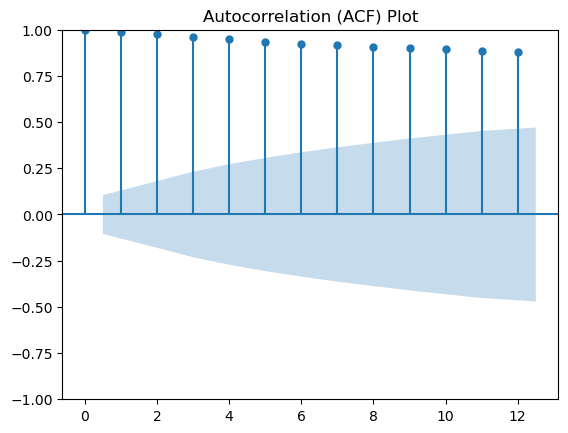

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(raw_data, lags=12)
plt.title("Autocorrelation (ACF) Plot")
plt.show()


- There is a positive correlation between the values for each month which indicate that past values have an effect on the current values

### **Rolling Statistics**

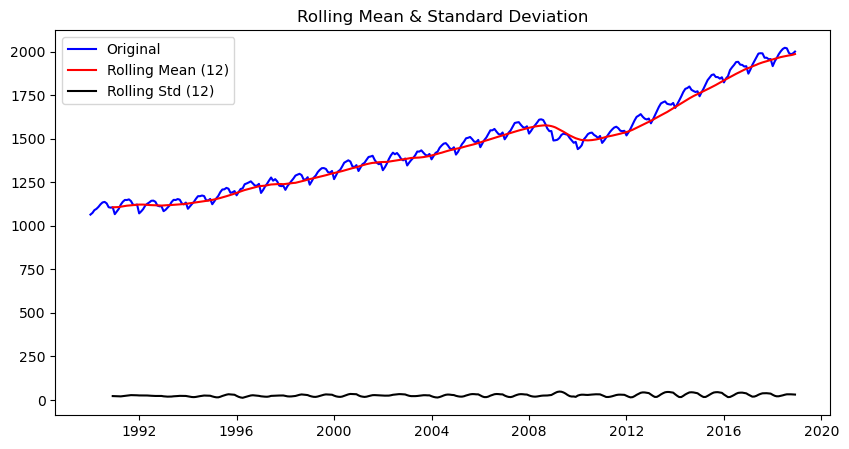

In [24]:
window = 12
rolling_mean = raw_data.rolling(window=window).mean()
rolling_std = raw_data.rolling(window=window).std()

plt.figure(figsize=(10,5))
plt.plot(raw_data, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label=f'Rolling Mean ({window})')
plt.plot(rolling_std, color='black', label=f'Rolling Std ({window})')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()


The average mean closely follows the observed trend pattern, indicating that it reliably represents the central tendency of the data points. Meanwhile, the standard deviation stays close to zero, suggesting very low variability around the mean and a stable pattern throughout the observed period.


### **Feature Engineering**